# Exploratory Data Analysis

### In this notebook, the data of the Spaceship Titantic Disaster will be visualized and relationships between the features and the response (as well as between features themselves) will be examined. The goal is to be able to predict whether a passenger was transported (response variable) in the test set.

In [1]:
# First start by importing the relevant packages:
import pandas as pd
import numpy as np
import itertools as it # will be used to combine two lists of HomePlanet & Destination while iterating
import matplotlib.pyplot as plt

In [2]:
# Load data (stored locally)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Succinct glimpse of the data:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
test.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [5]:
# Data summary
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


There are a few things that are apparent from this quick look at the data:
- All of the columns except for PassengerId & Transported contain NaN values
- PassengerID appears to be in the format FamilyId_FamilyMemberId. A unique identifier is probably not particularly useful for classification, but being able to potentially group passengers by family unit may prove useful.
- The Cabin column is in the format deck/cabin_number/ship_side (port or starboard). This too much information for a single column and should be split into three separate columns (features).

In [7]:
# Define a function to subdivide the PassengerId and Cabin columns:
def column_split(data):
    data['FamilyId'] = data.PassengerId.str.extract('(^[0-9]+)')
    data[['Cabin_deck','Cabin_number','Cabin_side']] = data.Cabin.str.split('/', expand = True)
    data = data.drop(columns = 'Cabin')
    return data

In [8]:
# Execute this function:
train = column_split(train)
test = column_split(test)

In [9]:
# Define lists for each of the feature types (e.g. continuous, categorical, etc.)
categorical_features = ['HomePlanet',
                        'CryoSleep',
                        'Destination',
                        'VIP',
                        'Cabin_deck',
                        'Cabin_side']
continuous_features = ['Age',
                       'RoomService',
                       'FoodCourt',
                       'ShoppingMall',
                       'Spa',
                       'VRDeck']
pseudo_features = ['FamilyId',
                   'Cabin_number']

In [10]:
# Now subdivide the training data into dataframes where the passengers were either transported or not
train_transported = train.loc[train.Transported == True]
train_not_transported = train.loc[train.Transported == False]

In [11]:
# Define a function to set x-axis labels and limits for plots:
def cont_feat_xlim_and_xlabel(feature):
    match feature:
        case 'Age':
            return plt.xlim(0, 80), plt.xlabel('Age')
        case 'RoomService':
            return plt.xlim(0, 6000), plt.xlabel('Room service expenditure')
        case 'FoodCourt':
            return plt.xlim(0, 12000), plt.xlabel('Food court expenditure')
        case 'ShoppingMall':
            return plt.xlim(0, 5000), plt.xlabel('Shopping mall expenditure')
        case 'Spa':
            return plt.xlim(0, 10000), plt.xlabel('Spa expenditure')
        case 'VRDeck':
            return plt.xlim(0, 10000), plt.xlabel('VR deck expenditure')
        
# Also define a function to make plots:
def plot_features(data, train_test, categorical_features, continuous_features, train_transported = None, train_not_transported = None):
    for feature in categorical_features: # make bar charts of the categorical features
        if train_test == 'Train': # check to see if data is the training set, then can subdivide feature into transported / not transported
            plot_total_temp = data[feature].value_counts()
            plot_trans_temp = train_transported[feature].value_counts()
            plot_not_trans_temp = train_not_transported[feature].value_counts()
            x = np.arange(len(plot_total_temp.index))
            width = 0.2
            fig, ax = plt.subplots()
            ax.bar(x - width, plot_total_temp, width, color = 'black', label = 'Total')
            ax.bar(x, plot_trans_temp, width, color = 'red', label = 'Transported')
            ax.bar(x + width, plot_not_trans_temp, width, color = 'blue', label = 'Not Transported')
            ax.legend()
            ax.set_xticks(x, plot_total_temp.index)
            plt.title(f'{train_test} set {feature} distribution')
            plt.xlabel('Categories')
            plt.ylabel('Count')
            plt.show()
        else:
            plot_temp = data[feature].value_counts()
            plot_temp.plot(kind = 'bar', color = 'black')
            plt.title(f'{train_test} set {feature} distribution')
            plt.xlabel('Categories')
            plt.ylabel('Count')
            plt.show()
    for feature in continuous_features: # make histograms of the continuous features
        if feature == 'Age':
            n_bins = list(np.linspace(0,80,33)) # this specifies the x-axis to have a range from 0 to 80 specifically for Age
        else:
            n_bins = 30
        if train_test == 'Train': # again check if the data is the training set (for transported / not transported subdivision)
            plt.hist(x = [data[feature], train_transported[feature], train_not_transported[feature]],
                     bins = n_bins,
                     color = ['black','red','blue'],
                     label = ['Total', 'Transported', 'Not Transported'])
            plt.title(f'{train_test} set {feature} distribution')
            plt.ylabel('Count')
            plt.legend(loc = 'upper right')
            cont_feat_xlim_and_xlabel(feature)
            plt.show()
        else:
            plt.hist(x = data[feature],
                     bins = n_bins,
                     color = 'black',
                     edgecolor = 'black',
                     alpha = 0.95)
            plt.title(f'{train_test} set {feature} distribution')
            plt.ylabel('Count')
            cont_feat_xlim_and_xlabel(feature)
            plt.show()

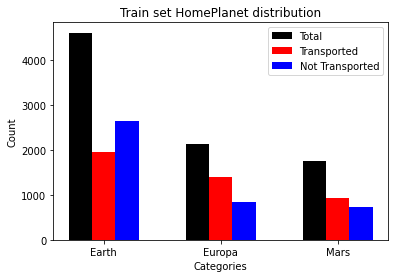

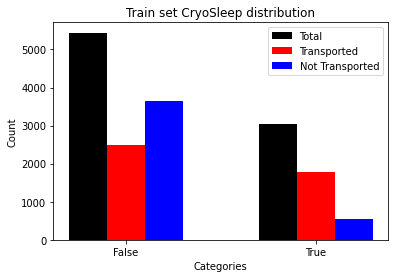

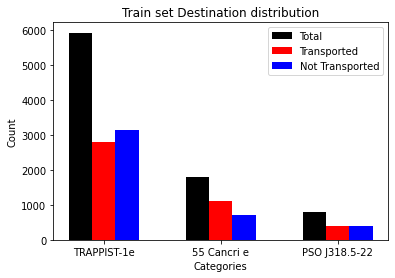

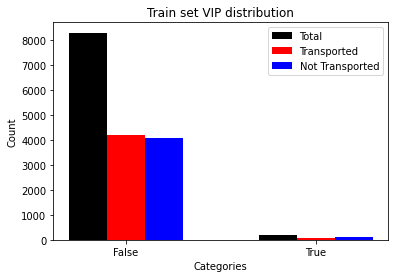

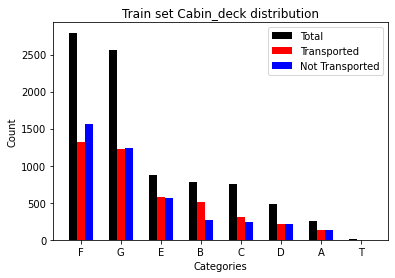

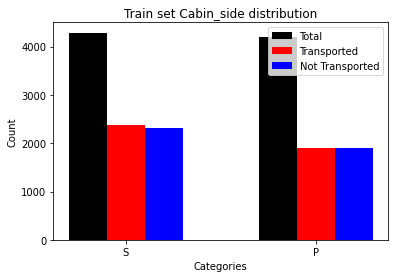

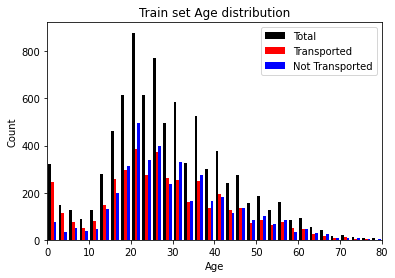

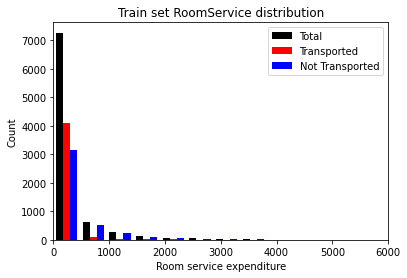

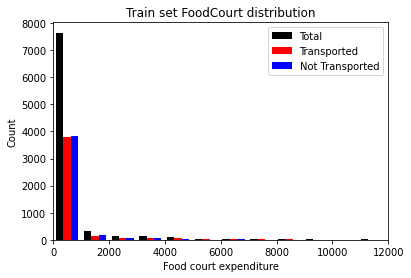

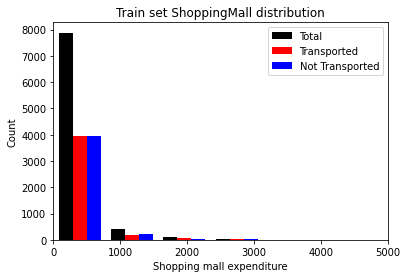

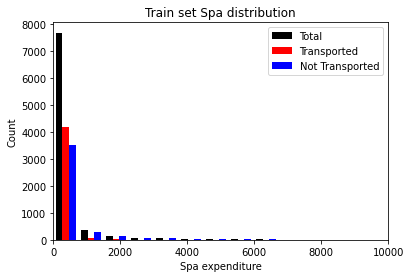

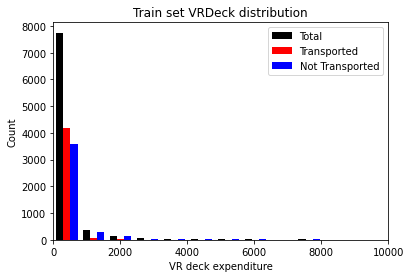

In [12]:
# Now generate plots from the training set:
plot_features(train, 'Train', categorical_features, continuous_features, train_transported, train_not_transported)

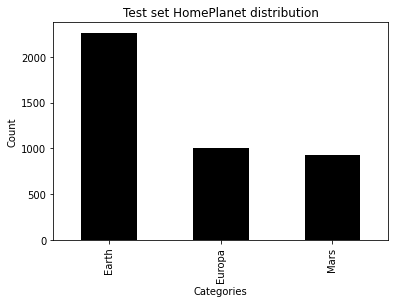

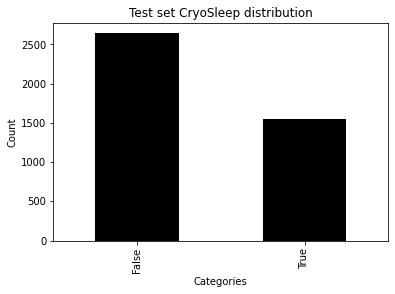

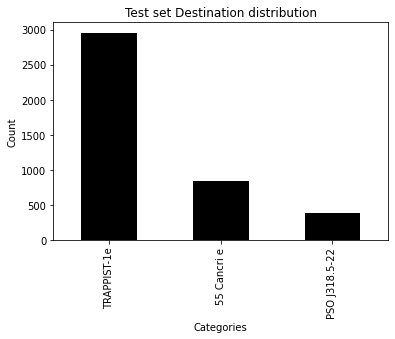

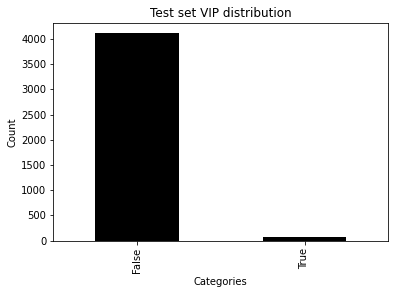

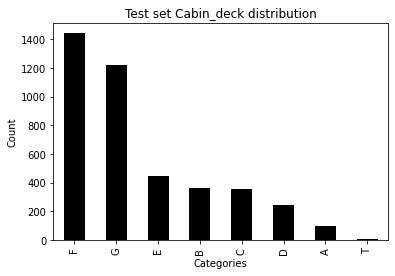

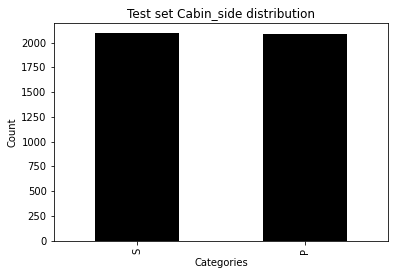

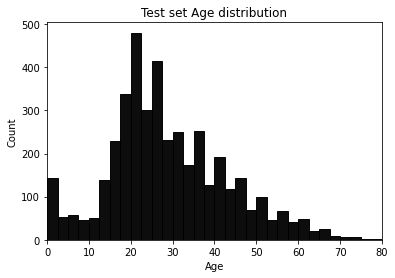

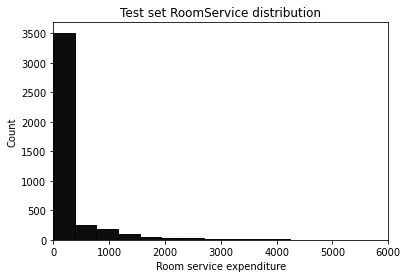

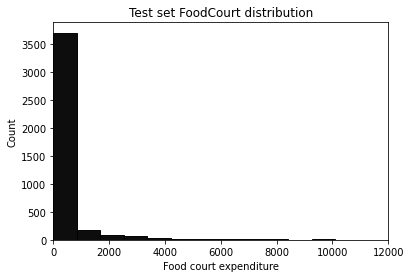

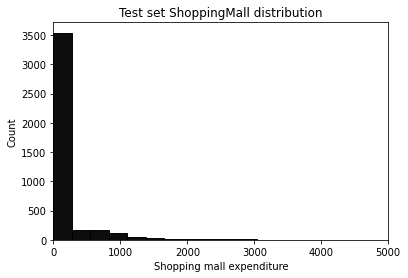

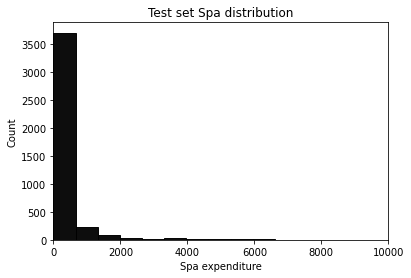

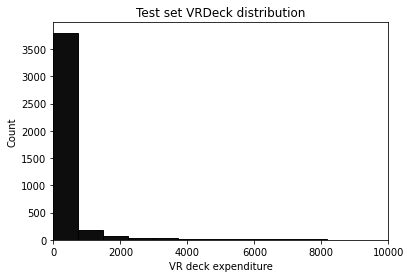

In [13]:
# Equivalent plots using the test data:
plot_features(test, 'Test', categorical_features, continuous_features)

It looks like the key features that impact whether a passenger was transported appear to be:
- HomePlanet
- CryoSleep
- Destination (weak impact)
- Cabin_deck
- Age
- RoomService
- Spa
- VRDeck

Let's look in more detail into these features, starting with whether there was a relationship between Cabin_deck and the amount of expenditures

In [14]:
# Define a list of expenditures
expenditures = ['RoomService',
                'FoodCourt',
                'ShoppingMall',
                'Spa',
                'VRDeck']
# Now get a list of the decks
cabin_decks = sorted(train.Cabin_deck.dropna().unique())
# Create a dictionary of expenditures per type per deck
expenditures_dict = dict((expenditure, dict((deck, train[expenditure].loc[train.Cabin_deck == deck]) for deck in cabin_decks)) for expenditure in expenditures)

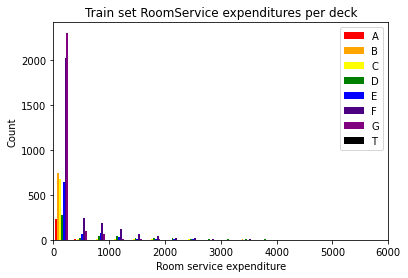

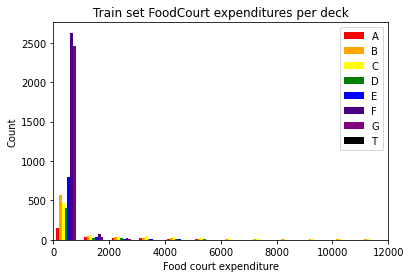

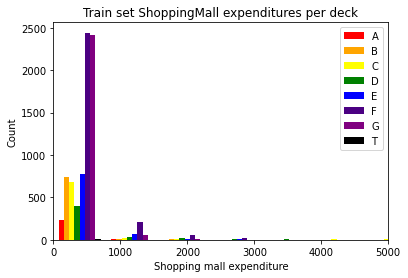

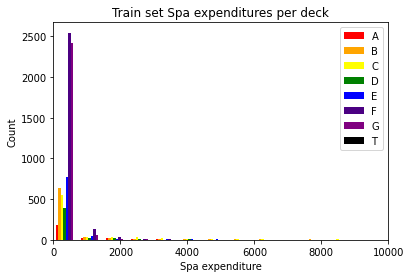

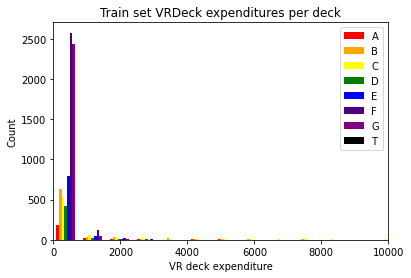

In [15]:
# Now use this dictionary to create a histogram for each expenditure type with each deck as a category:
for expenditure in expenditures:
    plt.hist(x = list(expenditures_dict[expenditure].values()),
             bins = 30,
             color = ['red','orange','yellow','green','blue','indigo','purple','black'],
             label = list(expenditures_dict[expenditure].keys()))
    plt.title(f'Train set {expenditure} expenditures per deck')
    plt.ylabel('Count')
    plt.legend(loc = 'upper right')
    cont_feat_xlim_and_xlabel(expenditure)
    plt.show()

- It appears that RoomService expenditure >0 is frequent more on F deck than any other deck (followed by G / E, and then D decks).
- There appears to be very few passengers spending money at the FoodCourt.
- Expenditures at the ShoppingMall appear to be mostly from passengers who were on F deck.
- Spenders at the Spa or VRDeck also seem to be more likely from F deck than other decks, but only barely.

Presumably cabin location impacts spending habits (rather than the converse), meaning that it may be possible to infer a passenger cabin location from their expenditures. This may prove useful as cabin deck definitely impacted whether a passenger was transported.

Let's see if embarkation point and destination are related to where the passenger was located on the ship. First define a new feature, "Itinerary", that corresponds to HomePlanet and Destination for a passenger, and then see if there are any relationships between where a passenger was traveling from/to and where they were located on the ship.

In [16]:
# Lists for HomePlanet / Destination pairs:
HomePlanet = ['Earth','Europa','Mars']
Destination = ['TRAPPIST-1e','55 Cancri e','PSO J318.5-22']
# Now make an series populated by the route the passenger is traveling:
itinerary_S = pd.Series(np.zeros(len(train)))
# use itertools.product here to combine the two lists into the nine possible options for passenger travel
for planet, dest in it.product(HomePlanet, Destination):
    itinerary_mask = (train.Destination == dest) & (train.HomePlanet == planet)
    itinerary_S = itinerary_S.mask(itinerary_mask, planet + ' to ' + dest)
# Save the itinerary series in the train dateframe
train['Itinerary'] = itinerary_S

In [17]:
# Now let's make a table of route vs cabin_deck:
route_list = list(planet + ' to ' + dest for planet,dest in it.product(HomePlanet,Destination))
route_count = pd.DataFrame(index = route_list)
deck_route_counts = route_count.copy()
for deck in cabin_decks:
    deck_route_counts = pd.concat([deck_route_counts, train.Itinerary.loc[train.Cabin_deck == deck].value_counts()], axis = 1)
    deck_route_counts = deck_route_counts.rename(columns = {'Itinerary':deck})
deck_route_counts = deck_route_counts.rename(index = {0.0:'NA'})
print('Travel route vs passenger cabin deck location:')
display(deck_route_counts)

Travel route vs passenger cabin deck location:


,A,B,C,D,E,F,G,T
Earth to TRAPPIST-1e,NaN,NaN,NaN,NaN,305.0,1087.0,1646.0,NaN
Earth to 55 Cancri e,NaN,NaN,NaN,NaN,46.0,271.0,359.0,NaN
Earth to PSO J318.5-22,NaN,NaN,NaN,NaN,28.0,217.0,451.0,NaN
Europa to TRAPPIST-1e,140.0,418.0,396.0,123.0,80.0,NaN,NaN,4.0
Europa to 55 Cancri e,106.0,328.0,313.0,62.0,45.0,NaN,NaN,NaN
Europa to PSO J318.5-22,2.0,3.0,13.0,NaN,NaN,NaN,NaN,NaN
Mars to TRAPPIST-1e,NaN,NaN,NaN,210.0,293.0,940.0,NaN,NaN
Mars to 55 Cancri e,NaN,NaN,NaN,47.0,21.0,123.0,NaN,NaN
Mars to PSO J318.5-22,NaN,NaN,NaN,16.0,12.0,20.0,NaN,NaN
NA,8.0,30.0,25.0,20.0,46.0,136.0,103.0,1.0


This looks interesting. HomePlanet seems to dominate which deck the passenger is on, with almost no influence from Destination. </br>
Decks for the corresponsing HomePlanets:
- Earth: E, F, G
- Mars: D, E, F
- Europa: A, B, C, D, E, T

Is there any difference between the age distributions traveling different routes (e.g. retirees on a cruise)?

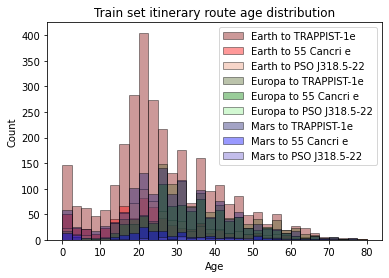

In [18]:
age_itinerary_color = ['maroon','red','darksalmon','darkolivegreen','green','lightgreen','midnightblue','blue','slateblue']
for i,route in enumerate(route_list):
    plt.hist(x = train.Age.loc[train.Itinerary == route],
             bins = list(np.linspace(0,80,33)),
             label = route,
             color = age_itinerary_color[i],
             edgecolor = 'black',
             alpha = 0.4)
    plt.title('Train set itinerary route age distribution')
    plt.ylabel('Count')
    plt.legend(loc = 'upper right')
    plt.xlabel('Age')
plt.show()

Earth to TRAPPIST-1e looks a little more skewed towards younger passengers than other routes, but the effect isn't too dramatic either.

In [19]:
# Before proceding further with analysis of boolean categorical variables, define a simple function generate dataframes containing results:
T_F = [True, False]
def T_F_df(blank_df, T_F_column, iterable_col, data = train, T_F = T_F):
    for value in T_F:
        blank_df = pd.concat([blank_df, data[iterable_col].loc[data[T_F_column] == value].value_counts()], axis = 1)
        blank_df = blank_df.rename(columns = {iterable_col:T_F_column + '_' + str(value)})
    blank_df[T_F_column + '_Fraction'] = blank_df[T_F_column + '_True'] / (blank_df[T_F_column + '_True'] + blank_df[T_F_column + '_False'])
    return blank_df

In [20]:
# Tranported vs Itinerary
transport_route_counts = route_count.copy()
transport_route_counts = T_F_df(transport_route_counts, 'Transported', 'Itinerary')
transport_route_counts = transport_route_counts.rename(index = {0.0:'NA'})
print('\nTransported fractions for travel routes:')
display(transport_route_counts)


Transported fractions for travel routes:


,Transported_True,Transported_False,Transported_Fraction
Earth to TRAPPIST-1e,1207,1894,0.389229
Earth to 55 Cancri e,348,342,0.504348
Earth to PSO J318.5-22,355,357,0.498596
Europa to TRAPPIST-1e,755,434,0.634987
Europa to 55 Cancri e,611,275,0.689616
Europa to PSO J318.5-22,14,5,0.736842
Mars to TRAPPIST-1e,755,720,0.511864
Mars to 55 Cancri e,118,75,0.611399
Mars to PSO J318.5-22,22,27,0.448980
NA,193,186,0.509235


Passengers originating from Europa appear to have been the most likely to be transported, whil passengers from Earth are the least likely.

In [21]:
# CryoSleep vs Itinerary
cryosleep_route_counts = route_count.copy()
cryosleep_route_counts = T_F_df(cryosleep_route_counts, 'CryoSleep', 'Itinerary')
cryosleep_route_counts = cryosleep_route_counts.rename(index = {0.0:'NA'})
print('\nFraction of passengers in CryoSleep for each travel route:')
display(cryosleep_route_counts)


Fraction of passengers in CryoSleep for each travel route:


,CryoSleep_True,CryoSleep_False,CryoSleep_Fraction
Earth to TRAPPIST-1e,809,2209,0.268058
Earth to 55 Cancri e,205,472,0.302806
Earth to PSO J318.5-22,355,340,0.510791
Europa to TRAPPIST-1e,447,711,0.386010
Europa to 55 Cancri e,441,420,0.512195
Europa to PSO J318.5-22,9,10,0.473684
Mars to TRAPPIST-1e,561,879,0.389583
Mars to 55 Cancri e,76,112,0.404255
Mars to PSO J318.5-22,11,36,0.234043
NA,123,250,0.329759


No obvious trends here.

In [22]:
# CryoSleep vs Cabin_deck
cryosleep_deck_counts = pd.DataFrame(index = list(cabin_decks))
cryosleep_deck_counts = T_F_df(cryosleep_deck_counts, 'CryoSleep', 'Cabin_deck')
print('\nFraction of passengers on each deck that are in CryoSleep:')
display(cryosleep_deck_counts)


Fraction of passengers on each deck that are in CryoSleep:


,CryoSleep_True,CryoSleep_False,CryoSleep_Fraction
A,68.0,182,0.272000
B,419.0,341,0.551316
C,294.0,430,0.406077
D,104.0,364,0.222222
E,168.0,688,0.196262
F,550.0,2176,0.201761
G,1350.0,1146,0.540865
T,NaN,4,NaN


So whether a passenger was in CryoSleep does seem to depend on which deck they were on. There might also actually be a relationship with both deck *and* route, which is not obvious when looking at the impact of route alone.

Is there an impact of age on whether a passenger was in CryoSleep? (Would particularly old or young passengers be more likely to be in CryoSleep than a middle-aged adult?)

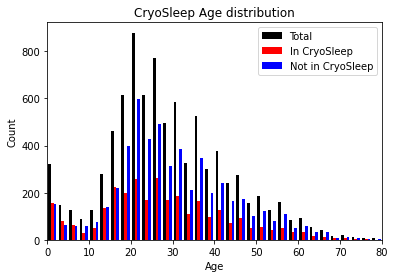

In [23]:
# CryoSleep vs Age
plt.hist(x = [train.Age, train.Age.loc[train.CryoSleep == True], train.Age.loc[train.CryoSleep == False]],
         bins = np.linspace(0,80,33),
         color = ['black','red','blue'],
         label = ['Total', 'In CryoSleep', 'Not in CryoSleep'])
plt.title('CryoSleep Age distribution')
cont_feat_xlim_and_xlabel('Age')
plt.ylabel('Count')
plt.legend(loc = 'upper right')
plt.show()

Children look more likely to be in CryoSleep than adults, but the frequency is still around 50% at most.

Lastly see how age varied with deck:

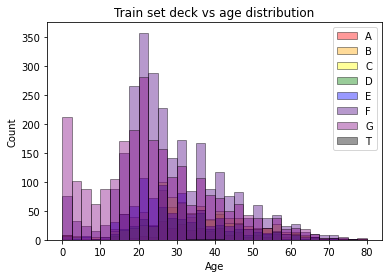

In [24]:
deck_color = ['red','orange','yellow','green','blue','indigo','purple','black']
for i,deck in enumerate(cabin_decks):
    plt.hist(x = train.Age.loc[train.Cabin_deck == deck],
             bins = list(np.linspace(0,80,33)),
             label = deck,
             color = deck_color[i],
             edgecolor = 'black',
             alpha = 0.4)
    plt.title('Train set deck vs age distribution')
    plt.ylabel('Count')
    plt.legend(loc = 'upper right')
    plt.xlabel('Age')
plt.show()

There is an obvious trend here. G deck was heavily skewed towards younger passengers with a large fraction of babies. To a lesser extent, F deck is as well. None of the other decks have anywhere near as many children.

#### This is sufficient for exploratory data analysis and visualization. Some of the insights gained here will proved useful in the next step of imputation. For example, it is clear that the age distribution for each deck will need to be considered separately, and it may also be possible to infer which deck a passenger was staying on based expenditures.